<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_Challenge_W6D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [23]:
import matplotlib.pyplot as plt

In [58]:
from scipy.stats import describe

In [60]:
from scipy import stats

In [66]:
import seaborn as sns

In [63]:
from scipy.stats import ttest_ind

In [1]:
from google.colab import files
uploaded = files.upload()
# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nayansubedi1/airplane-crashes-and-fatalities-upto-2023

Saving kaggle.json to kaggle.json
100% 624k/624k [00:00<00:00, 1.06MB/s]
100% 624k/624k [00:00<00:00, 1.06MB/s]


In [2]:
!unzip airplane-crashes-and-fatalities-upto-2023.zip

Archive:  airplane-crashes-and-fatalities-upto-2023.zip
  inflating: Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv  


In [73]:
# Import the dataset
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding='latin1')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [75]:
# Check for missing values
print(data.isnull().sum())

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64


In [76]:
# Assuming data is cleaned and processed
data.to_excel("cleaned_airplane_data.xlsx", index=False)

In [77]:
data['Date'] = pd.to_datetime(data['Date'])

In [78]:
# Drop rows where "Fatalities" is empty
data = data.dropna(subset=['Fatalities'])

# Verify that rows with empty "Fatalities" have been dropped
print(data.isnull().sum())

Date                        0
Time                     1504
Location                    4
Operator                   10
Flight #                 3661
Route                     770
AC Type                    13
Registration              271
cn/ln                     660
Aboard                     10
Aboard Passangers         221
Aboard Crew               218
Fatalities                  0
Fatalities Passangers     234
Fatalities Crew           233
Ground                     34
Summary                    60
dtype: int64


In [ ]:
# Check if there are any rows where the sum of "Aboard Passengers" and "Aboard Crew" is different from "Aboard"
inconsistent_aboard = data[data['Aboard'] != data['Aboard Passangers'] + data['Aboard Crew']]

# Display rows where the sum of "Aboard Passengers" and "Aboard Crew" is different from "Aboard"
inconsistent_aboard


In [ ]:
# Filter rows where "Aboard" is NaN
nan_aboard = data[data['Aboard'].isnull()]

# Display rows where "Aboard" is NaN
nan_aboard

In [ ]:
# Replace NaN values in "Aboard" with corresponding values from "Fatalities" for rows where "Aboard" is NaN
data.loc[data['Aboard'].isnull(), 'Aboard'] = data['Fatalities']
print(data.isnull().sum())

In [82]:
# Fill empty cells in 'Ground' column with 0
data['Ground'].fillna(0, inplace=True)
print(data.isnull().sum())

Date                        0
Time                     1504
Location                    4
Operator                   10
Flight #                 3661
Route                     770
AC Type                    13
Registration              271
cn/ln                     660
Aboard                      0
Aboard Passangers         221
Aboard Crew               218
Fatalities                  0
Fatalities Passangers     234
Fatalities Crew           233
Ground                      0
Summary                    60
dtype: int64


In [83]:
# Add a new column 'Survived' calculated as the difference between 'Aboard' and 'Fatalities'
data['Survived'] = data['Aboard'] - data['Fatalities']
print(data.isnull().sum())

Date                        0
Time                     1504
Location                    4
Operator                   10
Flight #                 3661
Route                     770
AC Type                    13
Registration              271
cn/ln                     660
Aboard                      0
Aboard Passangers         221
Aboard Crew               218
Fatalities                  0
Fatalities Passangers     234
Fatalities Crew           233
Ground                      0
Summary                    60
Survived                    0
dtype: int64


In [84]:
# Drop rows with empty values in 'Location' and 'Operator' columns
data.dropna(subset=['Location'], inplace=True)
data.dropna(subset=['Operator'], inplace=True)
print(data.isnull().sum())

Date                        0
Time                     1492
Location                    0
Operator                    0
Flight #                 3647
Route                     762
AC Type                    10
Registration              262
cn/ln                     648
Aboard                      0
Aboard Passangers         218
Aboard Crew               215
Fatalities                  0
Fatalities Passangers     231
Fatalities Crew           230
Ground                      0
Summary                    59
Survived                    0
dtype: int64


In [85]:
# Number of crashes
num_crashes = len(data)

# Total fatalities
total_fatalities = data['Fatalities'].sum()

# Total survived (passengers and crew)
total_survived = data['Aboard'].sum() - total_fatalities

# Survival rate
survival_rate = total_survived / data['Aboard'].sum()

# Display the basic statistics
print("Number of crashes:", num_crashes)
print("Total fatalities:", total_fatalities)
print("Total survived (passengers and crew):", total_survived)
print("Survival rate:", survival_rate)

Number of crashes: 4976
Total fatalities: 111541.0
Total survived (passengers and crew): 43782.0
Survival rate: 0.28187712058098285


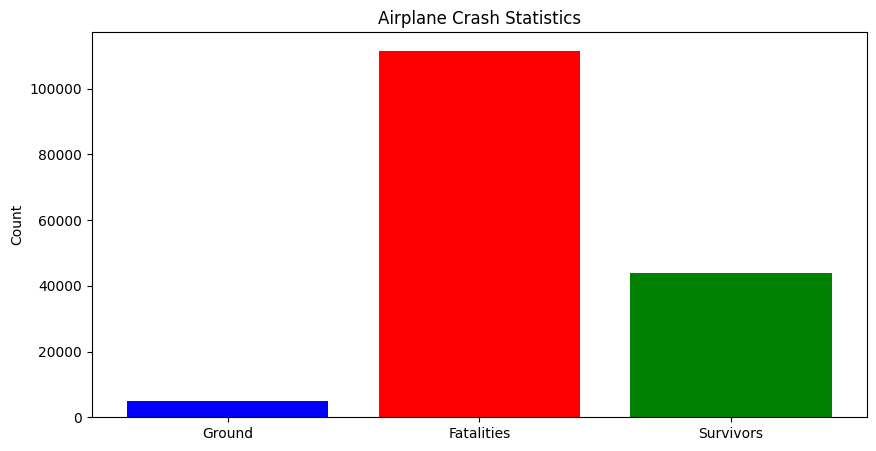

In [86]:
# Create a bar plot for number of crashes, fatalities, and survivors
plt.figure(figsize=(10, 5))
plt.bar(['Ground', 'Fatalities', 'Survivors'], [num_crashes, total_fatalities, total_survived], color=['blue', 'red', 'green'])
plt.title('Airplane Crash Statistics')
plt.ylabel('Count')
plt.show()

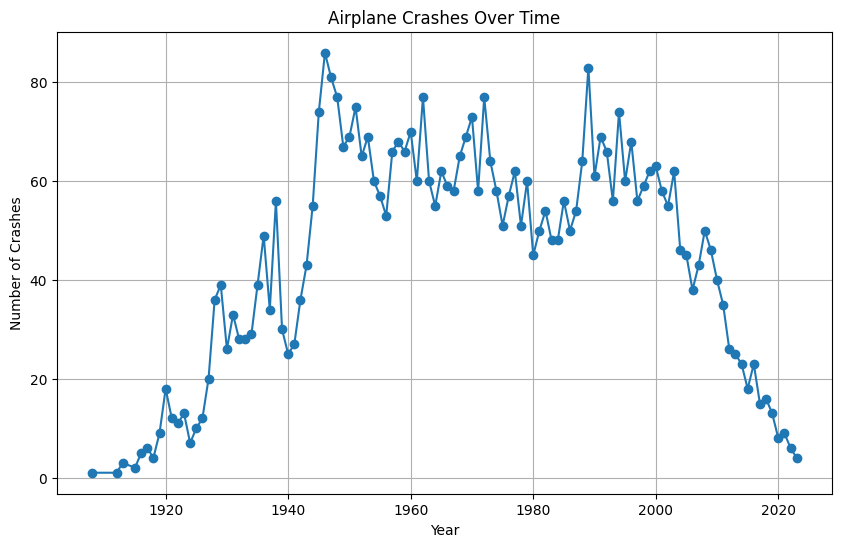

In [87]:
# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Count the number of crashes per year
crashes_per_year = data['Year'].value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o', linestyle='-')
plt.title('Airplane Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

In [88]:
# Find the year with the maximum number of crashes
max_crashes_year = crashes_per_year.idxmax()
max_crashes_count = crashes_per_year.max()

print("Year with the maximum number of crashes:", max_crashes_year)
print("Number of crashes in that year:", max_crashes_count)

Year with the maximum number of crashes: 1946
Number of crashes in that year: 86


From 1940 to 1947, we see an increase in airplane crashes .
May be there is a corelation with 1939-1945 ( the years of World War II)

In [89]:
# Filter the DataFrame for the year 1946
data_1946 = data[data['Year'] == 1946]

# Print the 'Summary' column for the year 1946
data_1946['Summary']


836    In worsening weather conditions, the plane lan...
837                                                  NaN
838    Experienced severe icing resulting in buffetin...
839          Crashed into a mountainside in a snowstorm.
840    The aircraft lost control and spiraled into th...
                             ...                        
919    While attempting to land in rain and fog, the ...
920    In heavy fog, the aircraft struck the roof of ...
921    The cargo plane crashed after both engines fai...
922    Crashed 1 mile from the airport on an island s...
923    Crashed after loosing power in both engines du...
Name: Summary, Length: 86, dtype: object

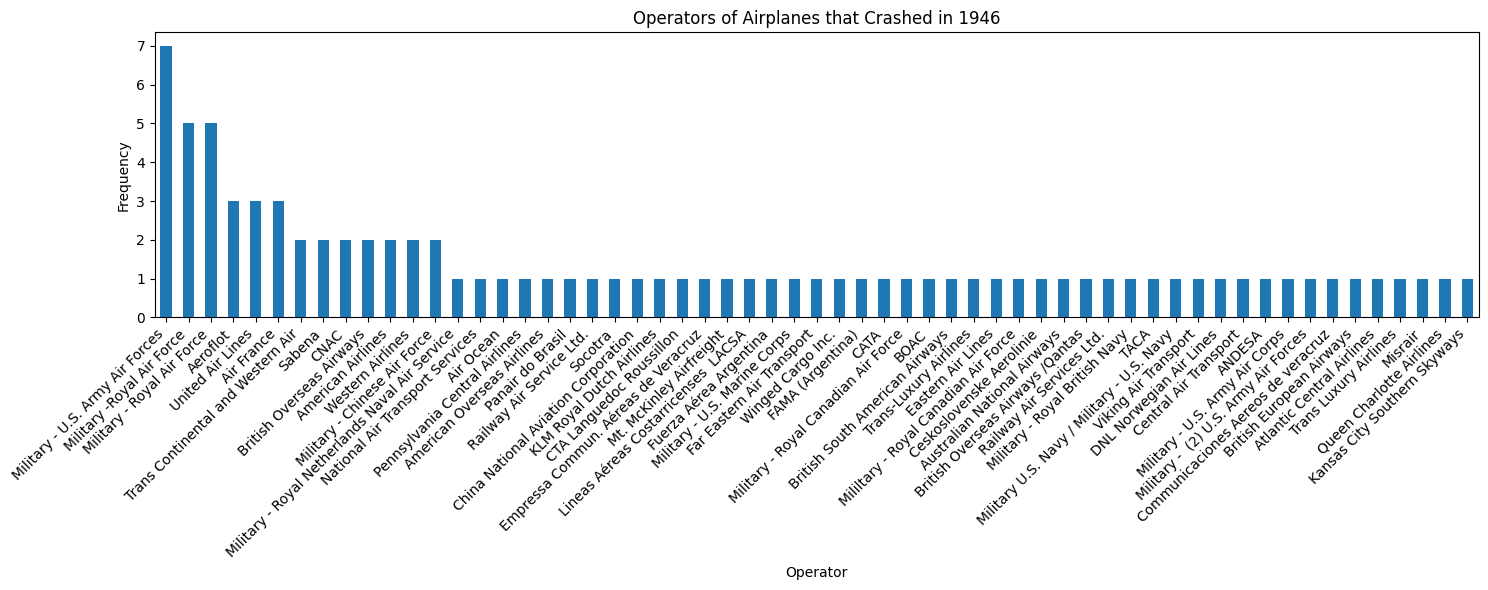

In [90]:
# Count the frequency of each operator
operator_counts = data_1946['Operator'].value_counts()

# Plot the bar plot
plt.figure(figsize=(15, 6))
operator_counts.plot(kind='bar')
plt.title('Operators of Airplanes that Crashed in 1946')
plt.xlabel('Operator')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<ipython-input-91-7002b794dda9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1946['IsMilitary'] = data_1946['Operator'].str.contains('Military', case=False)


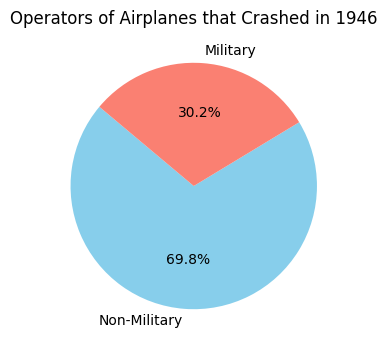

In [91]:
# Create a new column indicating whether the operator contains the word 'Military'
data_1946['IsMilitary'] = data_1946['Operator'].str.contains('Military', case=False)

# Group the data by the 'IsMilitary' column and count the frequency
operator_groups = data_1946.groupby('IsMilitary').size()

# Plot the pie plot
plt.figure(figsize=(4, 4))
plt.pie(operator_groups, labels=['Non-Military', 'Military'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Operators of Airplanes that Crashed in 1946')
plt.show()

<ipython-input-92-c5a8dd5a1341>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1946['IsMilitary'] = data_1946['Operator'].str.contains('Military', case=False)


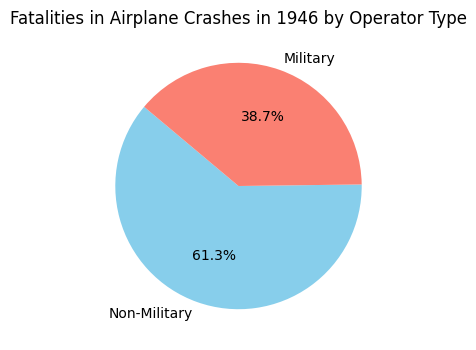

In [92]:
# Filter the DataFrame for the year 1946
data_1946 = data[data['Year'] == 1946]

# Create a new column indicating whether the operator contains the word 'Military'
data_1946['IsMilitary'] = data_1946['Operator'].str.contains('Military', case=False)

# Group the data by the 'IsMilitary' column and sum the number of fatalities
operator_fatalities = data_1946.groupby('IsMilitary')['Fatalities'].sum()

# Plot the pie plot
plt.figure(figsize=(4, 4))
plt.pie(operator_fatalities, labels=['Non-Military', 'Military'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Fatalities in Airplane Crashes in 1946 by Operator Type')
plt.show()

Percentage (of total number of crashes) of killed persons (38.7%) higher in relation to the number of crashes for military aviation (30.2%)

The percentage of military airplane crashes in 1946 seems significant

Number of crashes (2000-2022): 763
Total fatalities (2000-2022): 18307.0
Total survived (2000-2022): 8082.0
Survival rate (2000-2022): 0.3062639736253742


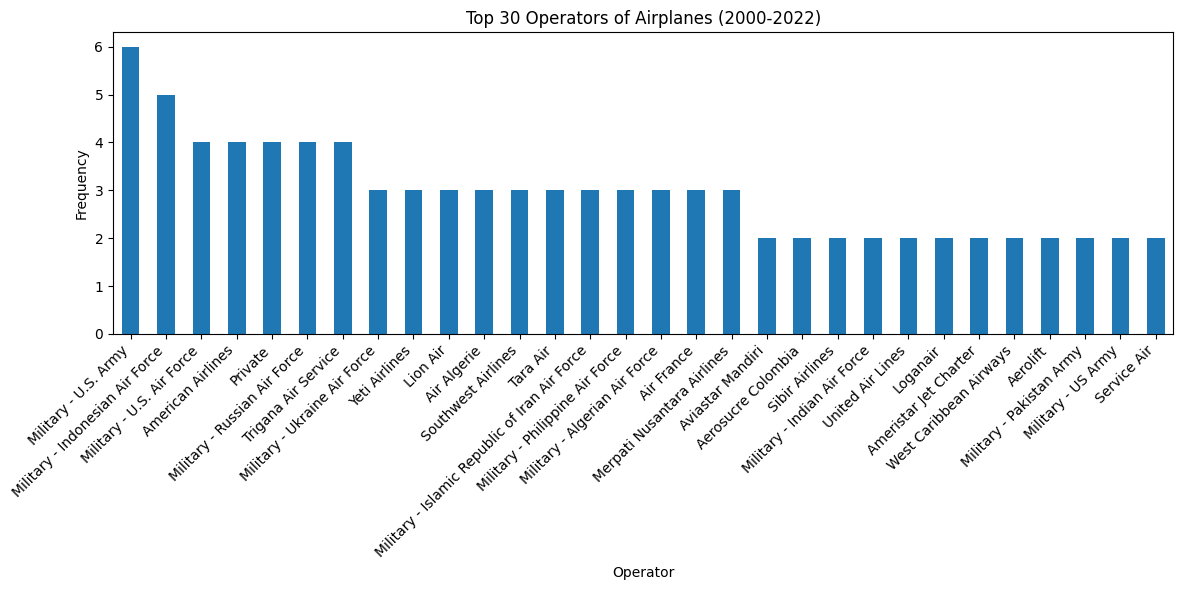

In [93]:
# Filter the DataFrame for the years 2000-2022
data_2000_2022 = data[(data['Year'] >= 2000) & (data['Year'] <= 2022)]

# Basic statistics
num_crashes = len(data_2000_2022)
total_fatalities = data_2000_2022['Fatalities'].sum()
total_survived = data_2000_2022['Aboard'].sum() - total_fatalities
survival_rate = total_survived / data_2000_2022['Aboard'].sum()

print("Number of crashes (2000-2022):", num_crashes)
print("Total fatalities (2000-2022):", total_fatalities)
print("Total survived (2000-2022):", total_survived)
print("Survival rate (2000-2022):", survival_rate)

# Visualization
# Count the frequency of each operator
operator_counts = data_2000_2022['Operator'].value_counts()

# Plot the top 10 operators by frequency
plt.figure(figsize=(12, 6))
operator_counts.head(30).plot(kind='bar')
plt.title('Top 30 Operators of Airplanes (2000-2022)')
plt.xlabel('Operator')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<ipython-input-94-684ec9788418>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2000_2020['IsMilitary'] = data_2000_2020['Operator'].str.contains('Military', case=False)


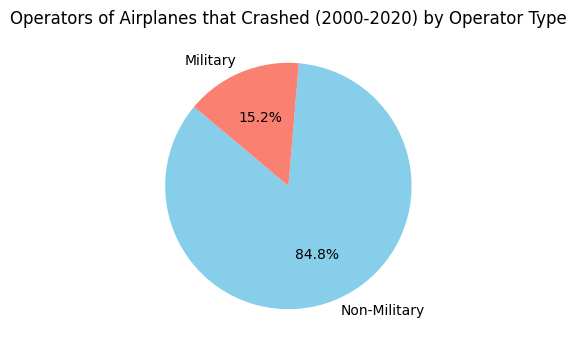

In [94]:
# Filter the DataFrame for the years 2000-2020
data_2000_2020 = data[(data['Year'] >= 2000) & (data['Year'] <= 2020)]

# Create a new column indicating whether the operator contains the word 'Military'
data_2000_2020['IsMilitary'] = data_2000_2020['Operator'].str.contains('Military', case=False)

# Group the data by the 'IsMilitary' column and sum the number of crashes for each category
operator_crashes = data_2000_2020.groupby('IsMilitary').size()

# Plot the pie plot
plt.figure(figsize=(4, 4))
plt.pie(operator_crashes, labels=['Non-Military', 'Military'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Operators of Airplanes that Crashed (2000-2020) by Operator Type')
plt.show()

<ipython-input-95-6cc85fa45cce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2000_2020['IsMilitary'] = data_2000_2020['Operator'].str.contains('Military', case=False)


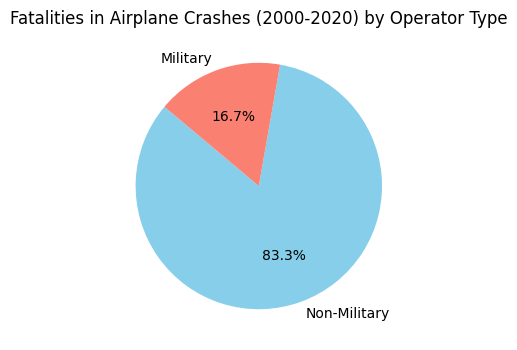

In [95]:
# Create a new column indicating whether the operator contains the word 'Military'
data_2000_2020['IsMilitary'] = data_2000_2020['Operator'].str.contains('Military', case=False)

# Group the data by the 'IsMilitary' column and sum the number of fatalities for each category
operator_fatalities = data_2000_2020.groupby('IsMilitary')['Fatalities'].sum()

# Plot the pie plot
plt.figure(figsize=(4, 4))
plt.pie(operator_fatalities, labels=['Non-Military', 'Military'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Fatalities in Airplane Crashes (2000-2020) by Operator Type')
plt.show()

For the period 2000-2020, the percentage of accidents in the military sector relative to the total number of accidents in that period is substantially lower than in 1946

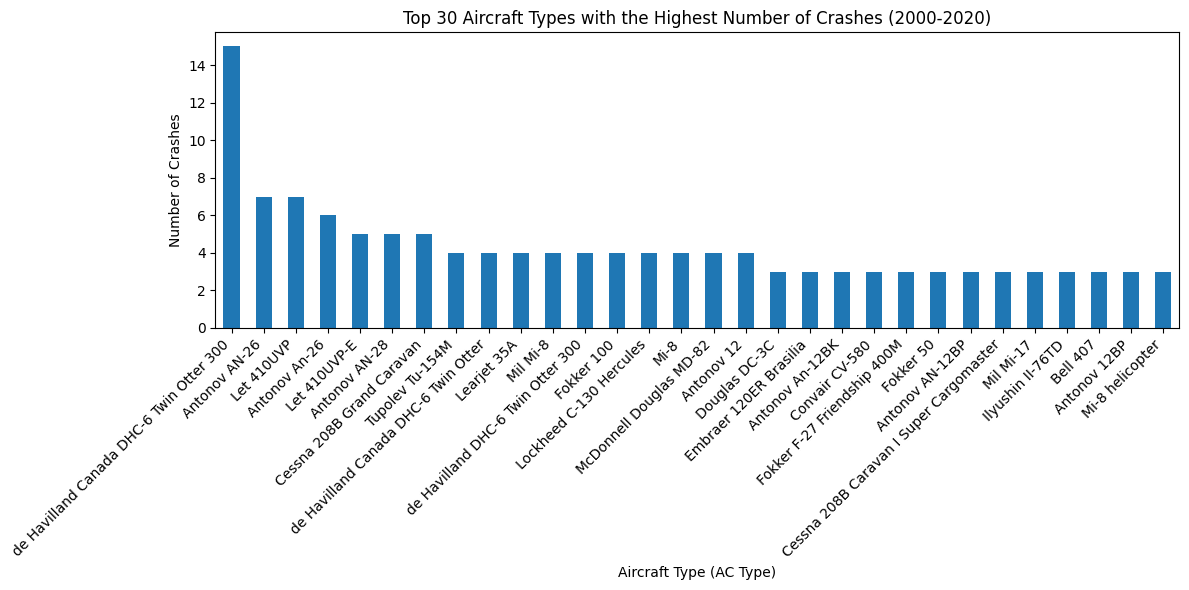

In [96]:
# Find the AC Type with the maximum number of airplane crashes
max_crashes_ac_type = data_2000_2020['AC Type'].value_counts().idxmax()

# Find the top 30 AC Types with the highest number of airplane crashes
top_30_ac_types = data_2000_2020['AC Type'].value_counts().head(30)

# Visualize the data using a bar plot
plt.figure(figsize=(12, 6))
top_30_ac_types.plot(kind='bar')
plt.title('Top 30 Aircraft Types with the Highest Number of Crashes (2000-2020)')
plt.xlabel('Aircraft Type (AC Type)')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [97]:
# Extract 'Fatalities' and 'Survived' columns
fatalities = data['Fatalities']
survived = data['Survived']

# Calculate key statistics for fatalities
fatalities_stats = describe(fatalities)
print("Fatalities Statistics:")
print(f"Mean: {fatalities_stats.mean:.2f}")
print(f"Median: {fatalities_stats.minmax[0]:.2f}")
print(f"Standard Deviation: {fatalities_stats.variance:.2f}")

# Calculate key statistics for survival rates
survival_rate = survived / data['Aboard']  # Assuming 'Aboard' represents total passengers and crew
survival_rate_stats = describe(survival_rate.dropna())
print("\nSurvival Rate Statistics:")
print(f"Mean: {survival_rate_stats.mean:.2f}")
print(f"Median: {survival_rate_stats.minmax[0]:.2f}")
print(f"Standard Deviation: {survival_rate_stats.variance:.2f}")

Fatalities Statistics:
Mean: 22.42
Median: 0.00
Standard Deviation: 1232.05

Survival Rate Statistics:
Mean: 0.18
Median: 0.00
Standard Deviation: 0.10


In [98]:
# Group the data by year
grouped_data = data_2000_2020.groupby('Year')

# Calculate key statistics for fatalities and survival rates for each year
statistics = {}
for year, group in grouped_data:
    fatalities_mean = stats.tmean(group['Fatalities'])
    fatalities_median = group['Fatalities'].median()
    fatalities_std = stats.tvar(group['Fatalities'])

    survival_rate_mean = (group['Aboard'] - group['Fatalities']).mean() / group['Aboard'].mean()
    survival_rate_median = (group['Aboard'] - group['Fatalities']).median() / group['Aboard'].median()
    survival_rate_std = (group['Aboard'] - group['Fatalities']).std() / group['Aboard'].std()

    statistics[year] = {'Fatalities': {'Mean': fatalities_mean, 'Median': fatalities_median, 'Standard Deviation': fatalities_std},
                        'Survival Rate': {'Mean': survival_rate_mean, 'Median': survival_rate_median, 'Standard Deviation': survival_rate_std}}

# Display the calculated statistics
for year, stats_dict in statistics.items():
    print(f"Statistics for year {year}:")
    print(f"  Fatalities: Mean={stats_dict['Fatalities']['Mean']}, Median={stats_dict['Fatalities']['Median']}, Std={stats_dict['Fatalities']['Standard Deviation']}")
    print(f"  Survival Rate: Mean={stats_dict['Survival Rate']['Mean']}, Median={stats_dict['Survival Rate']['Median']}, Std={stats_dict['Survival Rate']['Standard Deviation']}")
    print()

Statistics for year 2000:
  Fatalities: Mean=22.6984126984127, Median=7.0, Std=1364.310803891449
  Survival Rate: Mean=0.38967136150234744, Median=0.0, Std=0.8135769535179349

Statistics for year 2001:
  Fatalities: Mean=23.03448275862069, Median=9.5, Std=1819.2268602540835
  Survival Rate: Mean=0.34509803921568627, Median=0.0, Std=0.7896062149728961

Statistics for year 2002:
  Fatalities: Mean=24.927272727272726, Median=8.0, Std=1858.1057239057236
  Survival Rate: Mean=0.20058309037900873, Median=0.0, Std=0.2795725114677386

Statistics for year 2003:
  Fatalities: Mean=20.629032258064516, Median=4.0, Std=2074.1388154415654
  Survival Rate: Mean=0.15298013245033112, Median=0.0, Std=0.2075266931073926

Statistics for year 2004:
  Fatalities: Mean=14.391304347826088, Median=5.5, Std=596.6879227053139
  Survival Rate: Mean=0.2451539338654504, Median=0.0, Std=0.6290381964951245

Statistics for year 2005:
  Fatalities: Mean=28.755555555555556, Median=13.0, Std=1582.4616161616161
  Survival

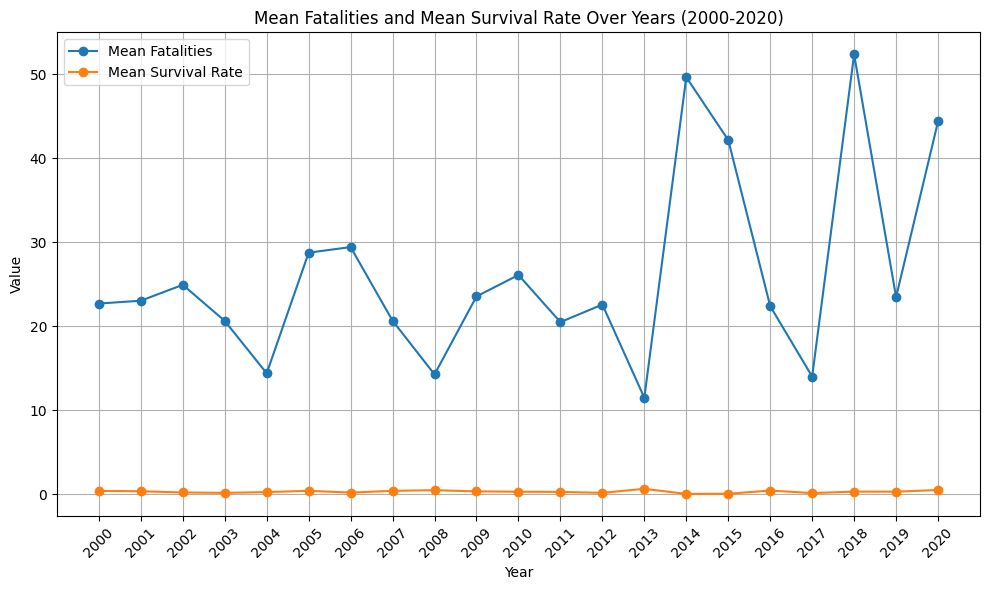

In [99]:
# Extract years, mean fatalities, and mean survival rates from the statistics dictionary
years = list(statistics.keys())
mean_fatalities = [statistics[year]['Fatalities']['Mean'] for year in years]
mean_survival_rate = [statistics[year]['Survival Rate']['Mean'] for year in years]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(years, mean_fatalities, marker='o', label='Mean Fatalities')
plt.plot(years, mean_survival_rate, marker='o', label='Mean Survival Rate')
plt.title('Mean Fatalities and Mean Survival Rate Over Years (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

To conduct a hypothesis test comparing the average number of fatalities in different decades, you can follow these steps:

Define the null hypothesis (H0) and the alternative hypothesis (H1).
Select a significance level (α).
Divide the data into different decades.
Calculate the average number of fatalities for each decade.
Perform a hypothesis test, such as a t-test or ANOVA, to compare the average number of fatalities between decades.
Determine whether to reject or fail to reject the null hypothesis based on the test results and the chosen significance level.

In [101]:
# Filter the DataFrame for the years 2000-2020
data_2000_2020 = data[(data['Year'] >= 2000) & (data['Year'] <= 2020)]

# Divide the data into two decades: 2000-2009 and 2010-2020
data_2000_2009 = data_2000_2020[data_2000_2020['Year'] < 2010]
data_2010_2020 = data_2000_2020[data_2000_2020['Year'] >= 2010]

# Calculate the average number of fatalities for each decade
mean_fatalities_2000_2009 = data_2000_2009['Fatalities'].mean()
mean_fatalities_2010_2020 = data_2010_2020['Fatalities'].mean()

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(data_2000_2009['Fatalities'], data_2010_2020['Fatalities'])

# Define significance level (alpha)
alpha = 0.05

# Print the results
print(f"Mean Fatalities (2000-2009): {mean_fatalities_2000_2009}")
print(f"Mean Fatalities (2010-2020): {mean_fatalities_2010_2020}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check if the null hypothesis can be rejected
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average number of fatalities between the two decades.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of fatalities between the two decades.")

Mean Fatalities (2000-2009): 22.08300395256917
Mean Fatalities (2010-2020): 27.929752066115704
T-statistic: -1.79151440811742
P-value: 0.07361601395675091
Fail to reject the null hypothesis: There is no significant difference in the average number of fatalities between the two decades.


In [102]:
# Filter the DataFrame for the years 1940-1949 and 2010-2019
data_1940_1949 = data[(data['Year'] >= 1940) & (data['Year'] <= 1949)]
data_2010_2019 = data[(data['Year'] >= 2010) & (data['Year'] <= 2019)]

# Calculate the average number of fatalities for each decade
mean_fatalities_1940_1949 = data_1940_1949['Fatalities'].mean()
mean_fatalities_2010_2019 = data_2010_2019['Fatalities'].mean()

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(data_1940_1949['Fatalities'], data_2010_2019['Fatalities'])

# Define significance level (alpha)
alpha = 0.05

# Print the results
print(f"Mean Fatalities (1940-1949): {mean_fatalities_1940_1949}")
print(f"Mean Fatalities (2010-2019): {mean_fatalities_2010_2019}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check if the null hypothesis can be rejected
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average number of fatalities between the two decades.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of fatalities between the two decades.")

Mean Fatalities (1940-1949): 15.49737302977233
Mean Fatalities (2010-2019): 27.367521367521366
T-statistic: -5.786560276868061
P-value: 1.0295625864822593e-08
Reject the null hypothesis: There is a significant difference in the average number of fatalities between the two decades.


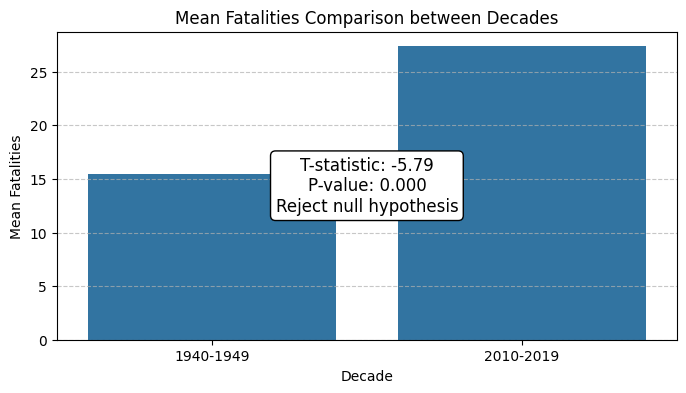

In [103]:
# Create a bar plot to compare the mean number of fatalities between the decades
plt.figure(figsize=(8, 4))
sns.barplot(x=['1940-1949', '2010-2019'], y=[mean_fatalities_1940_1949, mean_fatalities_2010_2019])
plt.title('Mean Fatalities Comparison between Decades')
plt.ylabel('Mean Fatalities')
plt.xlabel('Decade')
plt.annotate(f"T-statistic: {t_statistic:.2f}\nP-value: {p_value:.3f}\n{'Reject' if p_value < alpha else 'Fail to reject'} null hypothesis",
             xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", fc="w"))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The provided statistics offer valuable insights into the patterns and trends of airplane crashes and fatalities over the years 2000 to 2020:

Fatalities Analysis:

The mean number of fatalities per crash varied significantly from year to year, ranging from as low as approximately 11.48 in 2013 to as high as 52.375 in 2018.
There were noticeable fluctuations in the median number of fatalities, indicating variance in the severity of crashes across different years.
Standard deviations of fatalities were notably high in some years, such as 6465.96 in 2014 and 5640.38 in 2018, suggesting significant variability in the data and possibly outliers or extreme events in those years.
Survival Rate Analysis:

The mean survival rate, calculated as the proportion of survived passengers and crew to total aboard, varied considerably across different years.
Survival rates ranged from around 0.03 (or 3%) in 2014 to as high as 0.63 (or 63%) in 2013, indicating significant variability in the likelihood of survival from year to year.
Standard deviations of survival rates were relatively high in some years, suggesting considerable dispersion of survival rates around the mean.
Trends and Anomalies:

The years with exceptionally high mean fatalities, such as 2014 and 2018, might warrant further investigation to identify underlying causes or contributing factors.
Years with unusually low mean fatalities, such as 2013, could be examined to understand potential safety measures or factors that led to higher survival rates.
Fluctuations in mean fatalities and survival rates over time highlight the dynamic nature of aviation safety and the importance of continuous improvement in safety measures and regulations.
Impact of Extreme Events:

Extreme events, such as catastrophic crashes or accidents with high fatalities, can significantly influence the overall mean fatalities and survival rates for a particular year.
The presence of outliers with exceptionally high or low fatalities in certain years may skew the mean values and affect the interpretation of trends, necessitating careful consideration and potentially outlier removal techniques during analysis.
In conclusion, the statistical analysis provides valuable insights into the variability and dynamics of airplane crashes and fatalities over the years, highlighting the importance of ongoing safety efforts and the need for further research and analysis to enhance aviation safety and mitigate risks.